### Importing Modules

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt #pyplot is module which is used to plot graphs
import seaborn as sns

In [2]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Step-4 EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int

In [4]:
df.shape

(1338, 7)

(1338, 7)

In [5]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

### Data Visualization

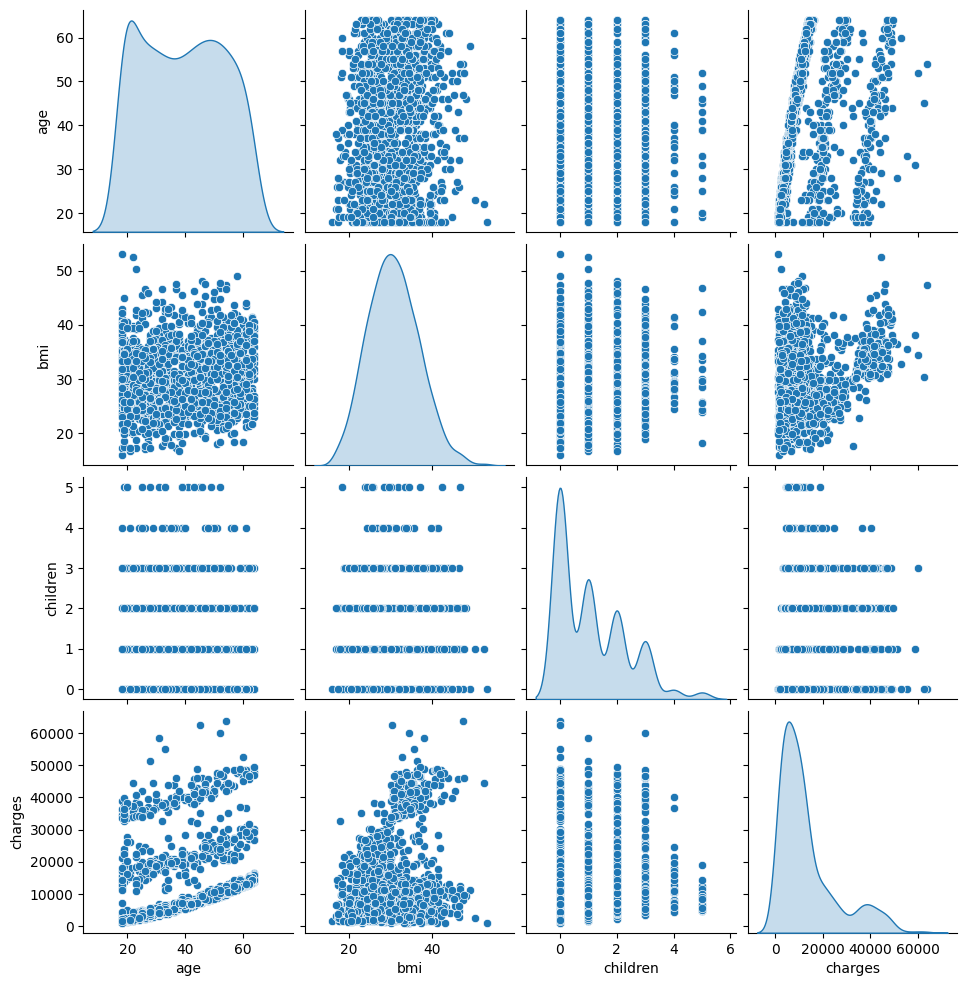

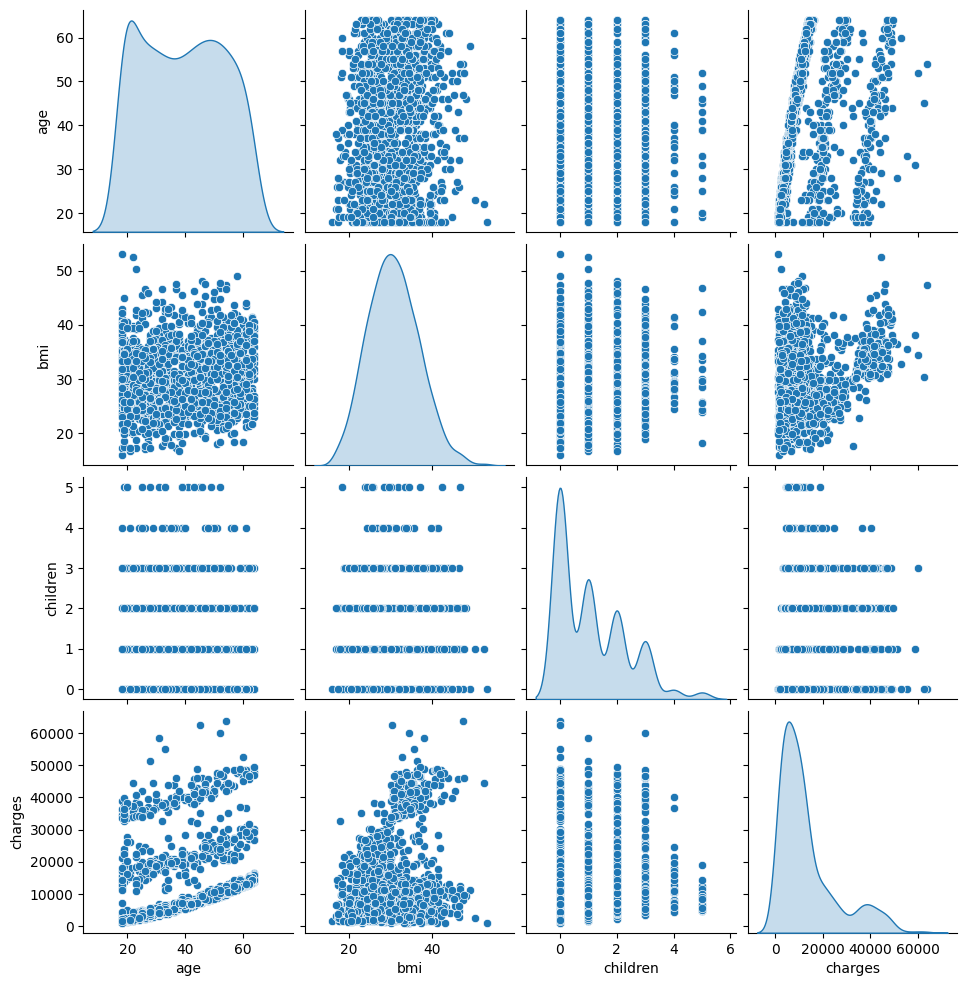

In [6]:
sns.pairplot(data=df, diag_kind='kde')

In [7]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot: xlabel='sex', ylabel='count'>

<AxesSubplot: xlabel='sex', ylabel='count'>

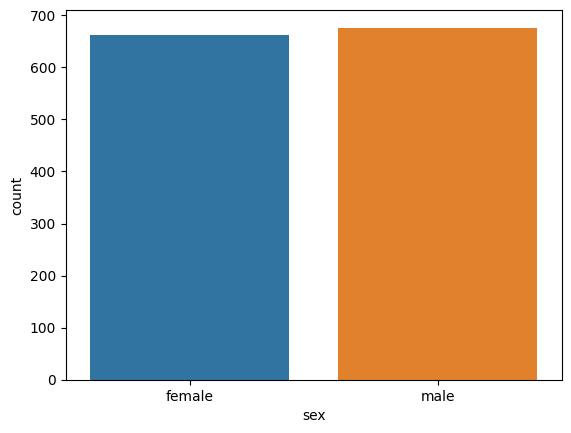

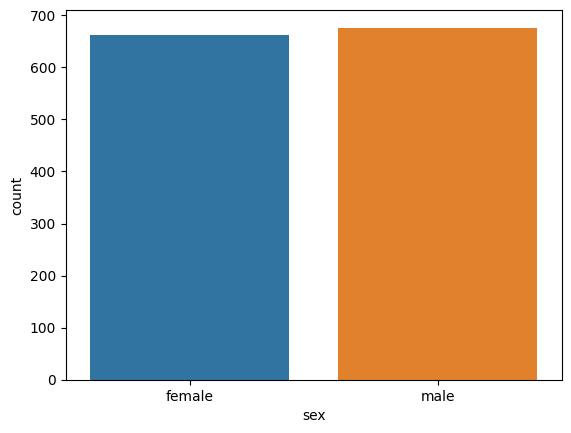

In [8]:
sns.countplot(x=df['sex'])

<AxesSubplot: xlabel='smoker', ylabel='count'>

<AxesSubplot: xlabel='smoker', ylabel='count'>

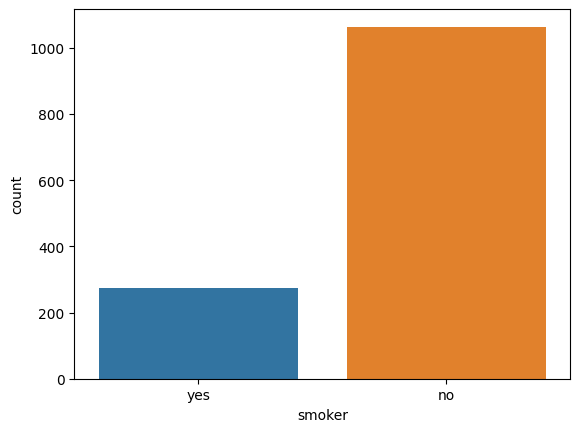

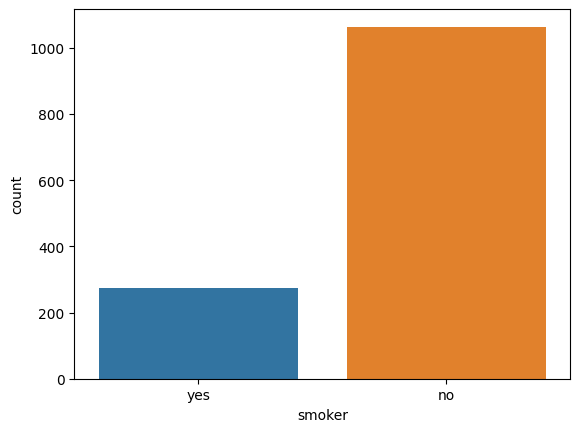

In [9]:
sns.countplot(x=df['smoker'])

<AxesSubplot: xlabel='children', ylabel='count'>

<AxesSubplot: xlabel='children', ylabel='count'>

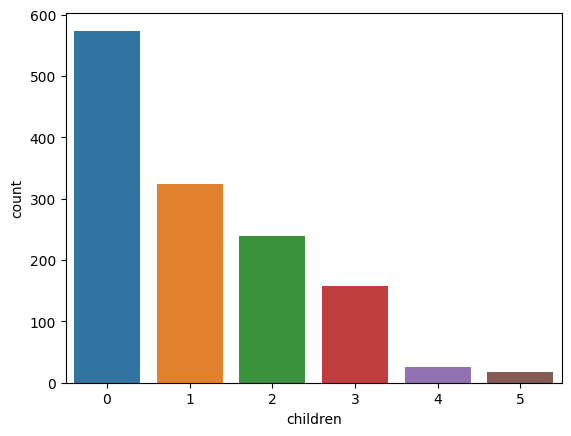

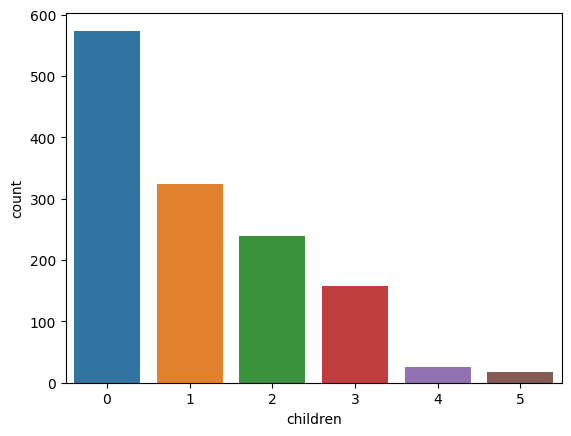

In [10]:
sns.countplot(x=df['children'])

<AxesSubplot: xlabel='region', ylabel='count'>

<AxesSubplot: xlabel='region', ylabel='count'>

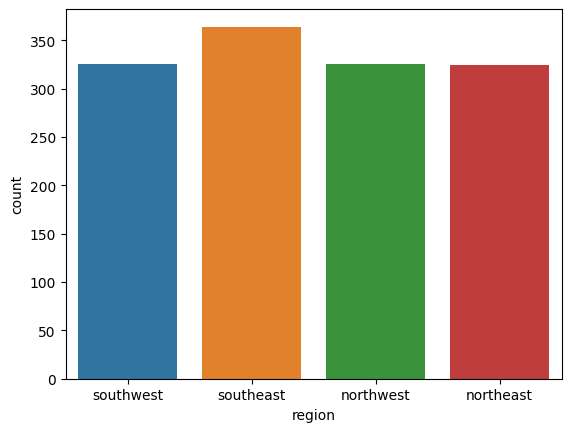

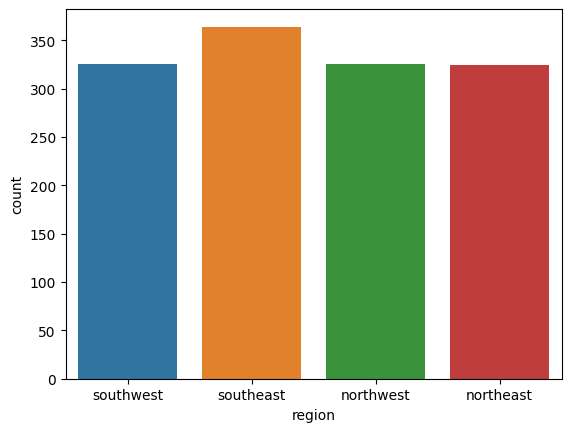

In [11]:
sns.countplot(x=df['region'])

### Boxplot to detect outliers

<AxesSubplot: xlabel='charges', ylabel='region'>

<AxesSubplot: xlabel='charges', ylabel='region'>

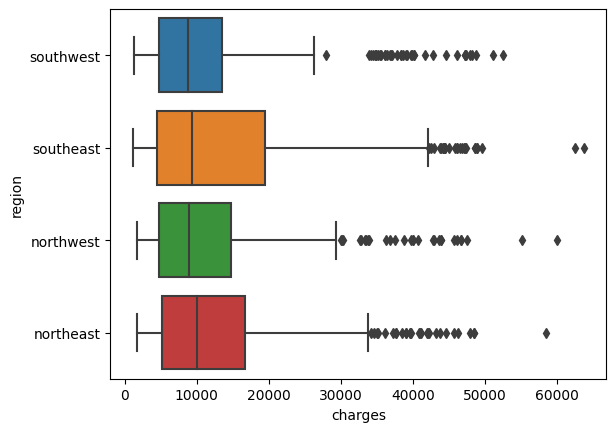

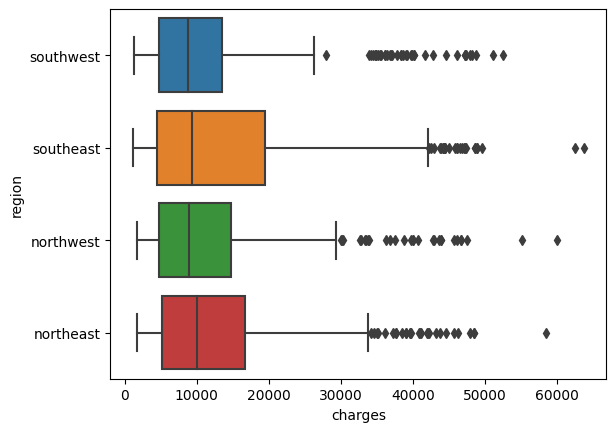

In [12]:
sns.boxplot(y=df['region'],x=df['charges'],orient='h')

<AxesSubplot: xlabel='charges', ylabel='sex'>

<AxesSubplot: xlabel='charges', ylabel='sex'>

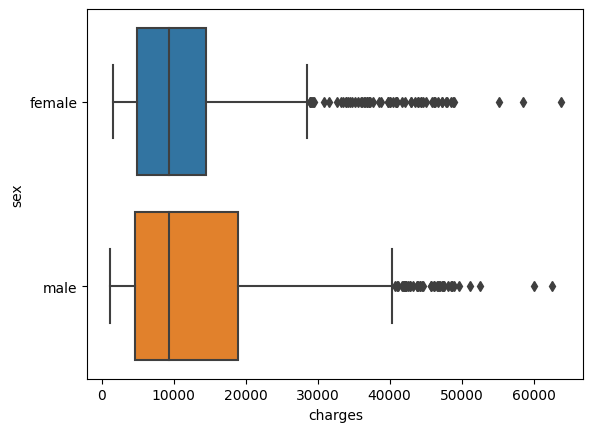

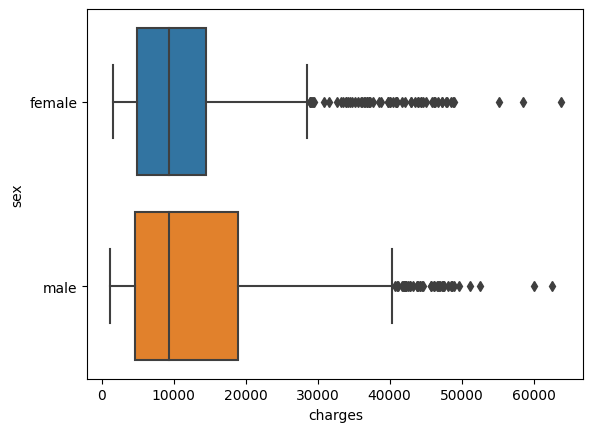

In [13]:
sns.boxplot(y=df['sex'],x=df['charges'],orient='h')

<AxesSubplot: xlabel='charges', ylabel='smoker'>

<AxesSubplot: xlabel='charges', ylabel='smoker'>

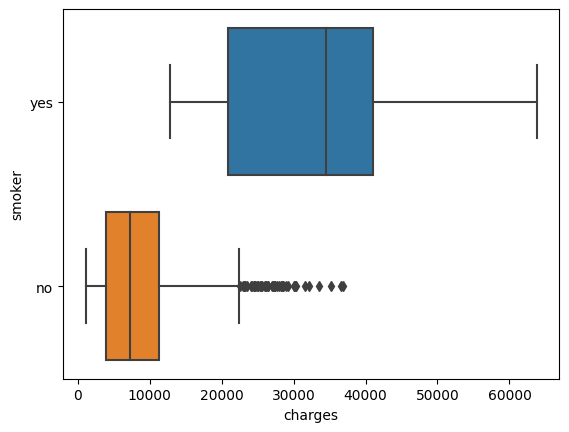

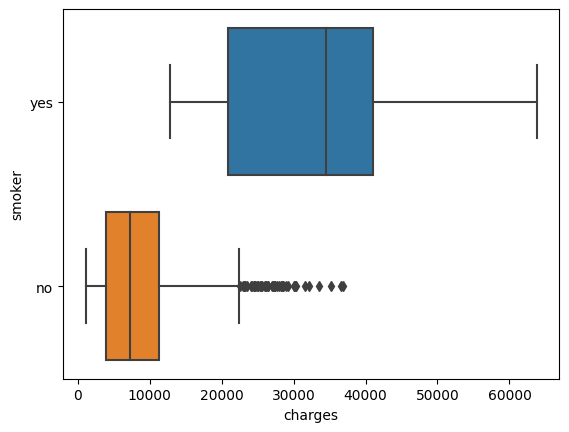

In [14]:
sns.boxplot(y=df['smoker'],x=df['charges'],orient='h')

<AxesSubplot: xlabel='charges', ylabel='children'>

<AxesSubplot: xlabel='charges', ylabel='children'>

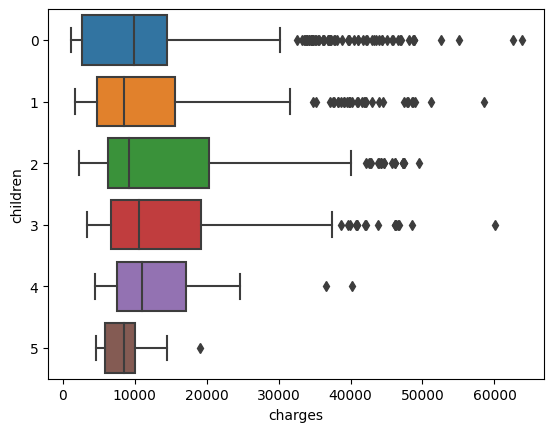

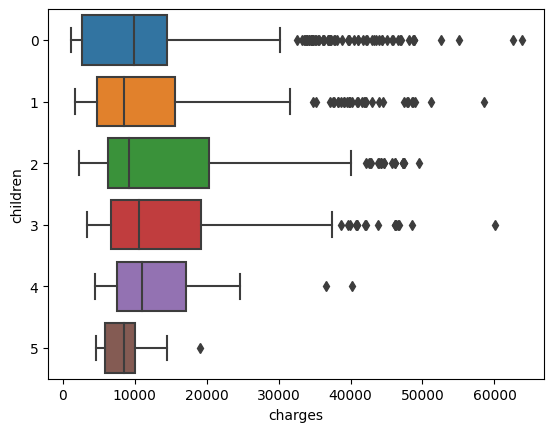

In [15]:
sns.boxplot(y=df['children'],x=df['charges'],orient='h')

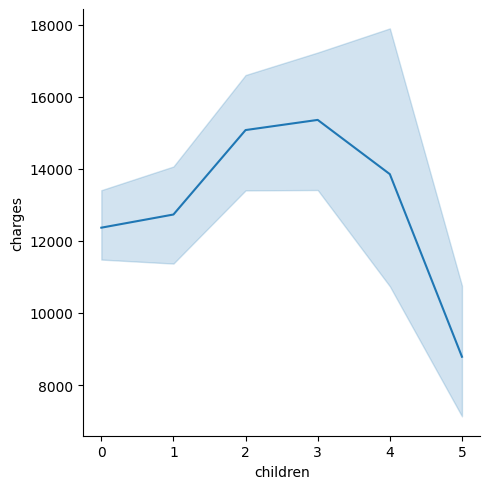

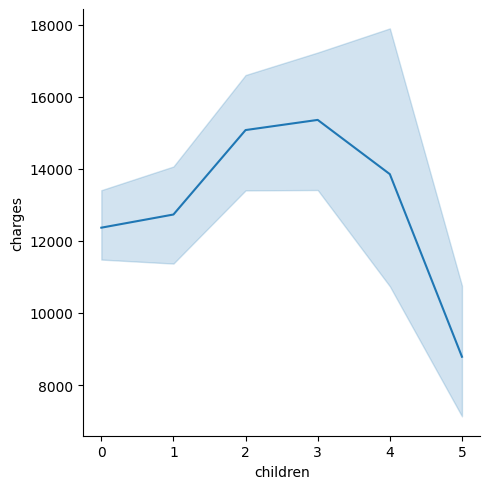

In [16]:
sns.relplot(data=df, x="children", y="charges", kind="line")

### ‘smoker’ has a considerable impact on the insurance charges, while gender has the least impact.

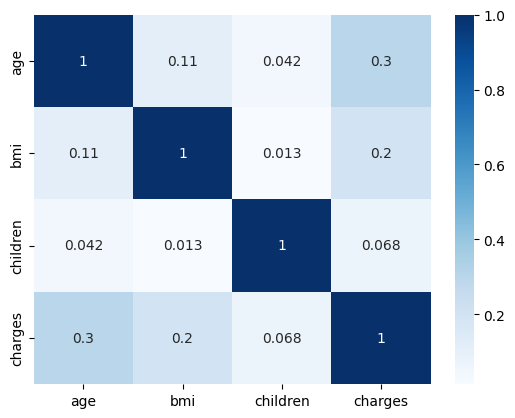

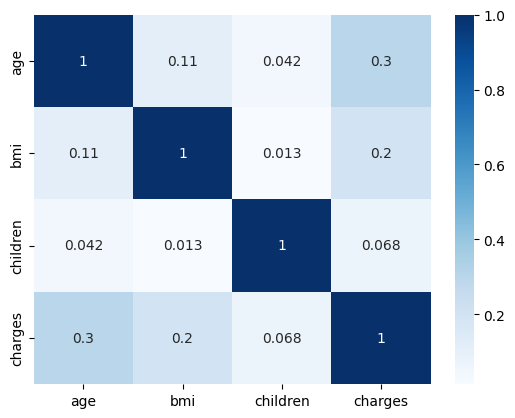

In [17]:
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), cmap='Blues', annot=True)
plt.show()

### Feature Encoding

##### Converting categorical column into numeric

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

In [20]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


### Feature Selection

In [21]:
df.drop('sex',axis=1,inplace=True)

In [22]:
df.head(1)

,age,bmi,children,smoker,region,charges
0,19,27.9,0,1,3,16884.924


,age,bmi,children,smoker,region,charges
0,19,27.9,0,1,3,16884.924


In [23]:
x=df.iloc[:,:-1]
y=df['charges']

#Split data into test and train
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.20, random_state=42)

### Standardization``

In [24]:
#Scaling numeric features using sklearn StandardScalar
from sklearn.preprocessing import StandardScaler
numeric=['age', 'bmi', 'children']
sc=StandardScaler()
xtrain[numeric]=sc.fit_transform(xtrain[numeric])
xtest[numeric]=sc.transform(xtest[numeric])

### Step 5 Predictive Modelling

In [25]:
#Import the model

from sklearn.linear_model import LinearRegression

#Create instance of the model

lr=LinearRegression()

#Train the model using fit method

lr.fit(xtrain,ytrain)

#Predict the obs.

ypred=lr.predict(xtest)

#### Evaluating Model

In [26]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.7833112270019789

0.7833112270019789

### Implementing Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
yhat = dt.predict(xtest)
r2_score(ytest, yhat)

0.735335400584517

0.735335400584517